In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('Solarize_Light2')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.dummy import DummyClassifier

In [3]:
df = pd.read_csv('data_can.csv')

### Select Feature Matrix and Target Vector

In [4]:
x = df.drop('can', axis=1)
y = df.can
x.shape, y.shape

((1877, 135), (1877,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1501, 135), (376, 135), (1501,), (376,))

### Grid Search for best Hyperparameters for SCV Algorithm

In [6]:
# Initialize and Hyperparameters for SVC 
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [7]:
parameters = {'C': [1,10,100,1000],
             'gamma': [0.1, 0.001, 0.0001, 0.00001],
             'kernel': ['rbf', 'poly']}

In [8]:
grid_search = GridSearchCV(svc, parameters, cv=10, n_jobs=-1, scoring= 'accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
0.8274613686534217
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [9]:
y_pred = grid_search.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.7952127659574468

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       210
           1       0.79      0.73      0.76       166

    accuracy                           0.80       376
   macro avg       0.79      0.79      0.79       376
weighted avg       0.79      0.80      0.79       376



In [17]:
cm= confusion_matrix(y_test, y_pred)

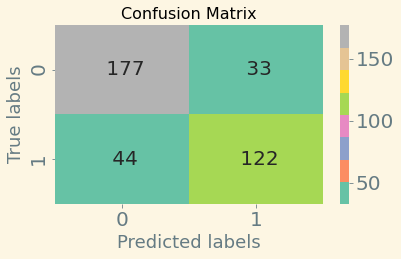

In [19]:
plt.rcParams['font.size'] = 20
ax= plt.subplot()
# Wenn die Zahlen integer sein sollen, mach fmt = ' '
sns.heatmap(cm, annot=True, ax = ax, cmap='Set2', fmt=" "); 
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);
ax.set_ylabel('True labels', fontsize=18); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);
plt.tight_layout()


In [11]:
# Algorithm is set, a better Score will come from more data. (Data Centric Approach)